ver: 20220917.1022

In [1]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Set a better print format for numpy values.
np.set_printoptions(formatter={'float': '{: 0.3f}'.format, 'int': '{: 5d}'.format})

# 1.1 离散时间信号———序列

## 1.1.2 序列的运算

### 1. 基于对幅度的运算

#### (1) 加法

$$ z(n) = x(n) + y(n) $$

【要点】

- 必须把两个序列 **“对齐”** 后才相加，即下标 $n$ 相同的元素相加。
- 如果一个序列在某些下标 $n$ 没有定义，但计算时又需要时，工程上一般可默认为值是零（特殊情况另当别论）。
- 两个有限长的序列相加，计算的结果也是有限长。

【例】设 
$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}, y(n)=\{\underline{1}, 3, 2\}$$
分别完成 $z(n)$ 的理论推导和编程计算。

解：

理论推导：将 $x(n)$ 和 $y(n)$ 对齐后对应元素相加，即可得加法计算结果 $z(n)$

$$
\begin{array}{r}
     x(n): &    &     &   -1 & \underline{0.5}   & -0.25 & 0.125 \\
     y(n): &    &     &      &   \underline{1}   &     3 &     2 \\
    \hline
     z(n): &    &     &   -1 & \underline{1.5}   & 2.75  & 2.125 \\
\end{array}
$$

编程计算（尝试1）：

In [2]:
# Define the sequences.

x = np.array([1, -1/2, 1/4, -1/8]); noff_x = 1
print("x =", x, ", noff_x =", noff_x)

y = np.array([1, 3, 2]); noff_y = 0
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000 -0.500  0.250 -0.125] , noff_x = 1
y = [    1     3     2] , noff_y = 0


In [3]:
# # Numpy's "+" operator is element-wise addition. It should be what we need, right?
# z = x + y
# print("x =", x)
# print("y =", y)
# print("z =", z)

【分析】当多个序列间进行运算操作时，需要注意操作对序列长度的要求。例如，加法等操作要求两个数组长度相同。如果数组长度不同，常用的方法就是**补零**。

编程计算（尝试2）：

In [4]:
x = np.array([-1, 1/2, -1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Pad y with 0, so that it has the same length as x
y = np.concatenate((y, [0]))

z = x + y
print("x =", x)
print("y =", y)
print("z =", z)

# There is no error now, but does it mean the result is correct?
# It is not what we are expecting! (expectation: z = [-1, 1.5, 2.75, 2.125])

x = [-1.000  0.500 -0.250  0.125]
y = [    1     3     2     0]
z = [ 0.000  3.500  1.750  0.125]


Text(0.5, 0, 'n')

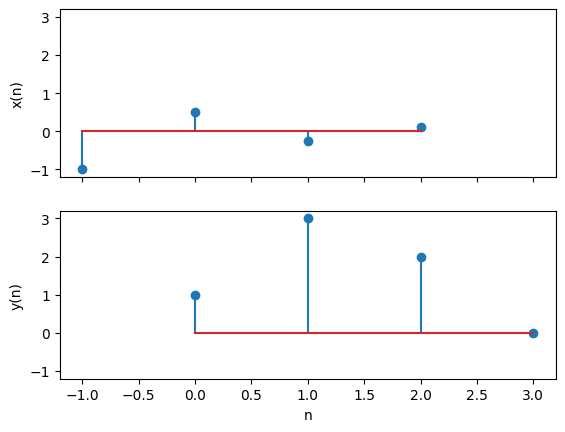

In [5]:
# Let's plot x and y to see what happens.
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')

【分析】从上面的例子可以看到，**补零**是不能随意的，不仅要保证两个数组的长度符合要求，还要让数组**对齐**，即要令到各**数组下标**相同的元素，其对应的理论**序列下标**也要相同。例如这里的数组元素 `x[0]`和`y[0]`，应该分别对应序列值$x(-1)$和$y(-1)$。

编程计算（尝试3）：

x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
y = [    0     1     3     2] , noff_y = 1
z = [-1.000  1.500  2.750  2.125] , noff_z = 1


Text(0.5, 0, 'n')

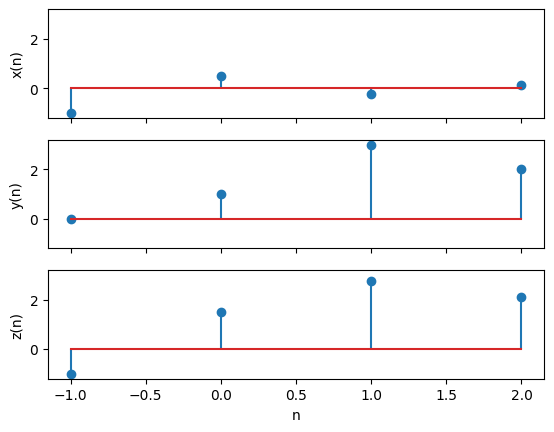

In [6]:
x = np.array([-1, 1/2, -1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Align x and y
y = np.concatenate(([0], y))
noff_y = noff_y + 1    # Q: Why do this?

z = x + y
noff_z = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)
print("z =", z, ", noff_z =", noff_z)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[2].stem(seq_n(z, noff_z), z)
axs[2].set_ylabel('z(n)')
axs[2].set_xlabel('n')

【结论】最后这次编程计算尝试的结果，与理论推导结果一致。

#### (2) 乘法

$$ w(n) = x(n) y(n) $$

【作业】试模仿以上“加法”的例子，完成以下计算的理论推导和编程计算。

设 
$$x(n)=\{\underline{-1}, \frac{1}{2}, -\frac{1}{4}, \frac{1}{8}\}, y(n)=\{1, 3, \underline{2}\}$$
求 $w(n)$

解： **(由学生完成)**

理论推导：

编程计算：

x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
y = [    0     1     3     2] , noff_y = 1
z = [-0.000  0.500 -0.750  0.250] , noff_z = 1


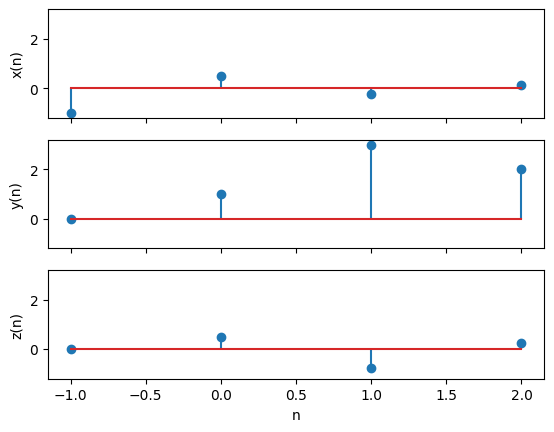

In [7]:
# [To be completed by students.]
# 创建一个numpy数组x，包含四个元素
x = np.array([-1, 1/2, -1/4, 1/8])
# x的偏移量
noff_x = 1

# 创建一个numpy数组y，包含三个元素
y = np.array([1, 3, 2])
# y的偏移量
noff_y = 0

# 在y数组前面添加一个元素0
y = np.concatenate(([0], y))
# 更新y的偏移量
noff_y = noff_y + 1

# 计算x和y的逐元素乘积并存储在z中
z = x * y
# z的偏移量与x相同
noff_z = noff_x

# 打印x, y, z及其偏移量
print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)
print("z =", z, ", noff_z =", noff_z)

# 创建一个3行1列的子图，共享x轴和y轴
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

# 在第一个子图上绘制x的茎叶图
axs[0].stem(seq_n(x, noff_x), x)
# 设置y轴标签
axs[0].set_ylabel('x(n)')

# 在第二个子图上绘制y的茎叶图
axs[1].stem(seq_n(y, noff_y), y)
# 设置y轴标签
axs[1].set_ylabel('y(n)')

# 在第三个子图上绘制z的茎叶图
axs[2].stem(seq_n(z, noff_z), z)
# 设置y轴标签
axs[2].set_ylabel('z(n)')
# 设置x轴标签
axs[2].set_xlabel('n')

# 显示图形
plt.show()


由于序列对齐是很常用的计算，编写一个通用函数来实现，既方便调用，又减少因反复重写而错误的机会。

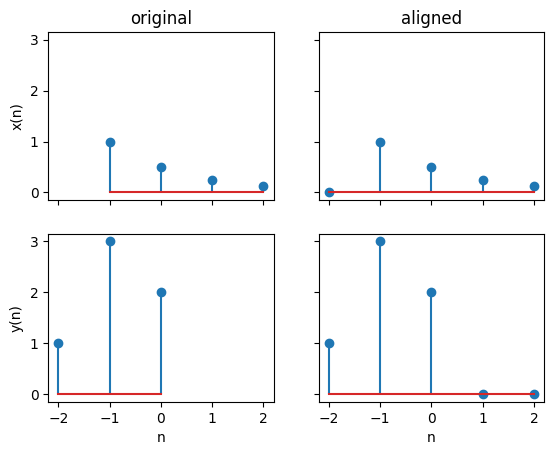

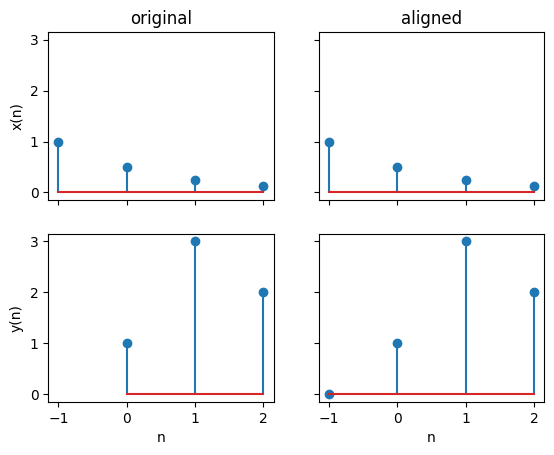

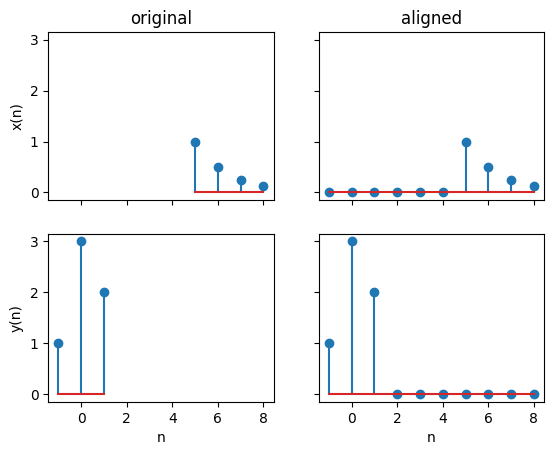

In [8]:
# [BEST PRACTICE] Build a general function for a commonly used operation.

def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)     # ?
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)   # ?
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))   # ?
    noff1 = -n_min  # ?
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))   # ?
    noff2 = -n_min  # ?
    return (seq1, noff1, seq2, noff2)

# [BEST PRACTICE] Unit test for a complex function.
# Note that this is not a standard unit test.
# It does not verify the result automatically, instead, it let users to observe the plots.
# This is good for education but not for engineering.
def test_seq_align():
    """Unit test for seq_align()"""
    def show_aligned_seqs(x, noff_x, y, noff_y):
        fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
        axs[0, 0].set_title('original')
        axs[0, 0].stem(seq_n(x, noff_x), x)
        axs[0, 0].set_ylabel('x(n)')
        axs[1, 0].stem(seq_n(y, noff_y), y)
        axs[1, 0].set_ylabel('y(n)')
        axs[1, 0].set_xlabel('n')

        (x, noff_x, y, noff_y) = seq_align(x, noff_x, y, noff_y)

        axs[0, 1].set_title('aligned')
        axs[0, 1].stem(seq_n(x, noff_x), x)
        axs[1, 1].stem(seq_n(y, noff_y), y)
        axs[1, 1].set_xlabel('n')

    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 2)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 0)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), -5, np.array([1, 3, 2]), 1)

# Run the unit test.
test_seq_align()

#### (3) 累加

$$ y(n) = \sum_{k=-\infty}^{n}x(k) $$

【要点】
- 理论上，$y(n)$ 是无限长的（就算 $x(n)$ 是有限长的）。
- 工程上，我们难以存储无限长的序列，因此计算 $y(n)$ 时我们一般取 $x(n)$ 有定义的范围。

【例】设 
$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$
求 $y(n)$

解：

理论推导：根据有限长序列 $x(n)$ 的定义区间，分三段计算 $y(n)$。

当 $n<-1$ 时，
$$ y(n) = \sum_{k=-\infty}^{n}x(k) = x(-\infty)+\dotsb+x(n-1)+x(n) = 0 + \dotsb + 0 + 0 = 0$$

当 $-1 \leqslant n \leqslant 2$ 时，
$$
\begin{array}{rl}
    y(-1) &= \sum_{k=-\infty}^{-1}x(k) = x(-1) = -1 \\
    y(0) &= \sum_{k=-\infty}^{0}x(k) = x(-1) + x(0) = -1 + 0.5 = -0.5 \\
    y(1) &= \sum_{k=-\infty}^{1}x(k) = x(-1) + x(0) + x(1) = -1 + 0.5 - 0.25 = -0.75 \\
    y(2) &= \sum_{k=-\infty}^{2}x(k) = x(-1) + x(0) + x(1) + x(2) = -1 + 0.5 - 0.25 + 0.125 = -0.625 \\
\end{array}
$$

当 $n>2$ 时，
$$
\begin{align}
y(n) &= \sum_{k=-\infty}^{n}x(k) \\
     &= \sum_{k=-\infty}^{2}x(k) + \sum_{k=3}^{n}x(k) \\
     &= y(2) + x(3) + \dotsb + x(n) \\
     &= -0.625 + 0 + \dotsb + 0 \\
     &= -0.625
\end{align}
$$

编程计算（尝试1）：

In [9]:
x = np.array([-1, 1/2, -1/4, 1/8]); noff_x = 1

# Why we need '+1' at the end?
# Why use np.arange() instead of range()?
y = np.array([sum(x[0:k]) for k in np.arange(x.size)+1])
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
y = [-1.000 -0.500 -0.750 -0.625] , noff_y = 1


编程计算（尝试2）：

In [10]:
x = np.array([-1, 1/2, -1/4, 1/8]); noff_x = 1

# [BEST PRACTICE] Use built-in method whenever possible.
y = x.cumsum()
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
y = [-1.000 -0.500 -0.750 -0.625] , noff_y = 1


【结论】两次编程计算的尝试和理论推导结果都一致。其中，第二次编程尝试使用了Numpy自带的累加计算函数，可信度较高。

#### (4) 序列的绝对和

$$ S = \sum_{n=-\infty}^{\infty} |x(n)| $$

【要点】

- 序列的绝对和 $S$ 是一个值，不是序列。
- 当 $|S|<\infty$ 时（又称为**有界**），序列 $x(n)$ 称为**绝对可和序列**。
- 对于有限长序列，其绝对和就是该序列有定义的范围内的值的绝对值的和。


【例】设
$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$
求 $S$

解：

理论推导：根据有限长序列 $x(n)$ 的定义区间，将 $S$ 的计算分成三项。

$$
\begin{align}
S &= \sum_{n=-\infty}^{\infty} |x(n)| \\
  &= \sum_{n=-\infty}^{-2} |x(n)| + \sum_{n=-1}^{2} |x(n)| + \sum_{n=3}^{\infty} |x(n)| \\
  &= 0 + \dotsb + 0 + |-1| + |0.5| + |-0.25| + |0.125| + 0 + \dotsb + 0 \\
  &= 1.875
\end{align}
$$


编程计算：

In [11]:
import numpy as np
#导入numpy库，用于数值计算

# 创建一个numpy数组，包含序列x的值
x = np.array([-1, 1/2, -1/4, 1/8])  
noff_x = 1  # 定义变量noff_x，赋值为1

# 定义一个lambda函数seq_abssum，计算传入数组的绝对值之和
seq_abssum = lambda x: np.sum(np.abs(x))  

# 调用seq_abssum函数，计算x的绝对值之和，并将结果赋值给S
S = seq_abssum(x)  

# 打印x和noff_x的值
print("x =", x, ", noff_x =", noff_x)  
# 打印计算得到的绝对值之和S
print("S = ", S)  

x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
S =  1.875


【结论】编程计算和理论推导结果一致。

#### (5) 序列的能量

$$ E[x(n)] = \sum_{n=-\infty}^{\infty} |x(n)|^{2} $$

【要点】

- 序列的能量 $E$ 是一个值，不是序列。
- 当 $|E|<\infty$ 时（又称为**有界**），序列 $x(n)$ 称为**能量信号**。
- 对于有限长序列，其能量就是该序列有定义的范围内的值的平方和。

【作业】试模仿以上“绝对和”的例子，完成以下计算的理论推导和编程计算。

设
$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$
求 $E[x(n)]$

解：**（由学生完成）**

理论推导：

编程计算：

In [12]:
# [To be completed by students.]
import numpy as np

# 给定数组 x
x = np.array([-1, 1/2, -1/4, 1/8])
# 偏移量是1
noff_x = 1

# 定义一个 lambda 函数来计算平方和
seq_squaresum = lambda x: np.sum(np.square(x))

# 计算 x 的平方和
E = seq_squaresum(x)

# 打印结果
print("x =", x, ", noff_x =", noff_x)
# 打印结果
print("E = ", E)


x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
E =  1.328125


#### (6) 序列的平均功率

$$ P[x(n)] = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x(n)|^2 $$

对于周期为 $N$ 的信号，只需计算一个周期的平均功率：
$$ P[x(n)] = \frac{1}{N} \sum_{n=0}^{N-1} |x(n)|^2 $$

对于长度为 $N$ 的有限长信号，一般只计算有效长度之内平均功率：
$$ P[x(n)] = \frac{1}{N} \sum_{n=n_0}^{n_0+N-1} |x(n)|^2 $$
其中，$x(n)$在区间 $n \in [n_0, n_0+ N-1]$ 有定义。

【要点】

- 序列的功率 $P$ 是一个值，不是序列。
- 当 $|P|<\infty$ 时（又称为**有界**），序列 $x(n)$ 称为**功率信号**。
- 功率 $P$ 是序列能量 $S$ 的平均值，反映了序列平均每个元素所携带的能量。

【作业】完成以下计算的理论推导和编程计算。

设
$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$
求 $P[x(n)]$

解：**（由学生完成）**

理论推导：

编程计算：

In [13]:
import numpy as np

# 给定数组 x
x = np.array([-1, 1/2, -1/4, 1/8])
noff_x = 1

# 定义一个 lambda 函数来计算平方和
seq_squaresum = lambda x: np.sum(np.square(x))

# 计算 x 的平方和
P = seq_squaresum(x)

# 获取 x 的元素个数
num_elements = x.size

# 计算平方和除以元素个数
average_square = P / num_elements

# 打印结果
print("x =", x, ", noff_x =", noff_x)
# 打印结果
print("P = ", P)
# 打印结果
print("Average square = ", average_square)


x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
P =  1.328125
Average square =  0.33203125


### 2. 基于对变量的运算

#### (1) 移位

$$ y(n)=x(n-m) $$

【要点】

- 当 $m>0$ 时，称 $y(n)$ 比 $x(n)$ **延迟** $|m|$ 个采样。
- 当 $m<0$ 时，称 $y(n)$ 比 $x(n)$ **超前** $|m|$ 个采样。

【例】设

$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$

求 $y(n)=x(n+2)$

解：

理论推导：

- 当 $n<-3$ 时，$n+2<-1$，$y(n) = x(n+2)$ 没有定义。
- 当 $-3 \leqslant n \leqslant 0$ 时，
$$
\begin{align}
y(-3) &= x(-3 + 2) = x(-1) = -1 \\
y(-2) &= x(-2 + 2) = x(0) = 0.5 \\
y(-1) &= x(-1 + 2) = x(1) = -0.25 \\
 y(0) &= x(0 + 2) = x(2) = 0.125 \\
\end{align}
$$
- 当 $n>0$ 时，$n+2>2$，$y(n) = x(n+2)$ 也没有定义。

因此 $y(n)=\{-1, 0.5, -0.25, \underline{0.125}\}$。


编程计算：

m = -2
x = [-1.000  0.500 -0.250  0.125] , noff_x = 1
y = [-1.000  0.500 -0.250  0.125] , noff_y = 3


Text(0.5, 0, 'n')

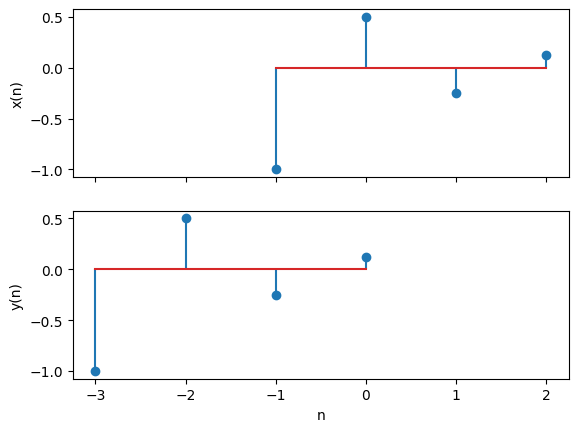

In [14]:
x = np.array([-1, 1/2, -1/4, 1/8]); noff_x = 1

m = -2  # Why not m=2?

# Build a general function.
seq_shift = lambda seq, noff, m: (seq, noff - m)   # Why noff-m?

(y, noff_y) = seq_shift(x, noff_x, m)

print("m =", m)
print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')

【结论】编程计算结果与理论推导结果一致。

### (2) 翻褶

$$ y(n)=x(-n) $$

【要点】

- 以 $n=0$ 为轴心翻转。

【作业】完成以下计算的理论推导和编程计算。

设

$$x(n)=\{-1, \underline{\frac{1}{2}}, -\frac{1}{4}, \frac{1}{8}\}$$

求 $y(n)=x(-n)$

解：**（由学生完成）**

理论推导：

编程计算：

原始序列 x(n): [-1.000  0.500 -0.250  0.125] 偏移量 noff_x = 1
翻转序列 y(n): [ 0.125 -0.250  0.500 -1.000] 偏移量 noff_y = -4


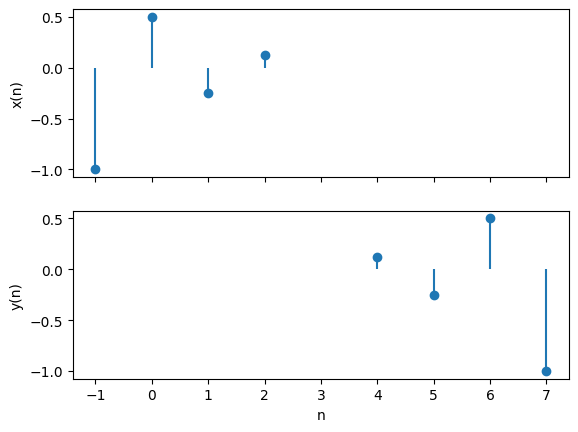

In [15]:
# [To be completed by students.]
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# 创建一个数组 x，包含序列的值
x = np.array([-1, 1/2, -1/4, 1/8])
# 设置序列的偏移量 noff_x
noff_x = 1

# 定义一个函数，根据序列和偏移量生成 n 的值
def seq_n(seq, noff):
    return np.arange(-noff, -noff + len(seq))

# 定义一个函数，用于翻转序列并计算新的偏移量
def flip_sequence(seq, noff):
    return seq[::-1], -noff - len(seq) + 1

# 翻转序列 x 并获取新的偏移量 noff_y
y, noff_y = flip_sequence(x, noff_x)

# 打印原始序列 x 和它的偏移量 noff_x
print("原始序列 x(n):", x, "偏移量 noff_x =", noff_x)
# 打印翻转后的序列 y 和它的偏移量 noff_y
print("翻转序列 y(n):", y, "偏移量 noff_y =", noff_y)

# 创建一个图形窗口，包含两个子图
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
# 在第一个子图上绘制原始序列 x 的茎叶图
axs[0].stem(seq_n(x, noff_x), x, basefmt=" ")
# 在第一个子图上绘制y轴
axs[0].set_ylabel('x(n)')
# 在第二个子图上绘制翻转序列 y 的茎叶图
axs[1].stem(seq_n(y, noff_y), y, basefmt=" ")
# 在第二个子图上绘制y轴
axs[1].set_ylabel('y(n)')
# 在第二个子图上绘制x轴
axs[1].set_xlabel('n')

# 显示图形窗口
plt.show()



【作业】（可选）编写一个通用的序列翻褶计算函数 `seq_flip`。

要求：

- 函数的API必须如下注释所示。
- 要有相应的测试函数 `test_seq_flip` 来验证 `seq_flip` 的正确性。
- 利用 `seq_flip` 和上文提供的 `seq_shift` 函数，计算 $y(n)=x(n-2)$，并与理论推导结果对比。$x(n)$ 的值自拟。

提示：可模仿上文中的 `seq_align` 函数及其测试函数 `test_seq_align` 的形式。

In [16]:
# Build a general function for flipping a seqence.

# The API of the function:
#
# seq_flip(seq, noff)
#    Returns a flipped sequence.
#
#    Parameters: 
#        seq: array_like
#             Input sequence.
#        noff: int
#             n's offset, i.e. the index of seq where n=0.
#    Returns: (seq, noff)
#        seq: array_like
#             Output sequence.
#        noff: int
#             n's offset.

# [To be completed by students.]